## Introduction:

The Fourier Transform is a cornerstone of mathematical analysis that allows the decomposition of complex functions into their fundamental frequency components. This transformative approach is not merely a theoretical construct but a practical tool with applications spanning music, medicine, and signal processing. By converting a time-domain signal, such as a sound wave, into its frequency-domain representation, the Fourier Transform reveals the underlying structure of the signal, enabling deeper insights and innovative applications.

The ability to approximate any function using the Fourier series positions it as a universal tool in analysis. In the context of sound waves, the Fourier Transform's utility becomes even more evident. For example, applications like Shazam leverage this technique to identify songs by analyzing their unique frequency signatures. Similarly, in medicine, sound analysis can detect anomalies in heartbeats or breathing patterns, aiding in the diagnosis of conditions like arrhythmias or respiratory disorders.

The Discrete Fourier Transform (DFT), a computational implementation of the Fourier Transform for discrete signals, is pivotal in these applications. Its eigenvalues and eigenvectors enable the diagonalization of the DFT matrix, a process that optimizes storage and computation. This diagonalization reduces redundancy, accelerates calculations, and makes real-time applications like music identification or medical diagnostics feasible even with limited computational resources.

## Fourier Analysis:

\begin{array}{@{}l@{}}

\text{In this notebook, we will approximate a function \( f(x) \) using a Fourier series expansion.\\\\
The Fourier series representation decomposes \( f(x) \) into a series of cosine and sine functions at different frequencies \( k \).}\\\\

\text{The Fourier series for a function \( f(x) \) is given by:}\\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{\infty} \left(A_k \cos(kx) + B_k \sin(kx)\right)\\\\

\text{where \( A_k \) and \( B_k \) are the Fourier coefficients, representing the amplitude of the cosine and sine terms at each frequency \( k \). \\\\
These coefficients are determined by projecting \( f(x) \) onto the cosine and sine basis functions.}

\end{array}


Given a function f(x) we would like to approximate it using the fourier analysis. 
As an example we will first define a function f(x):

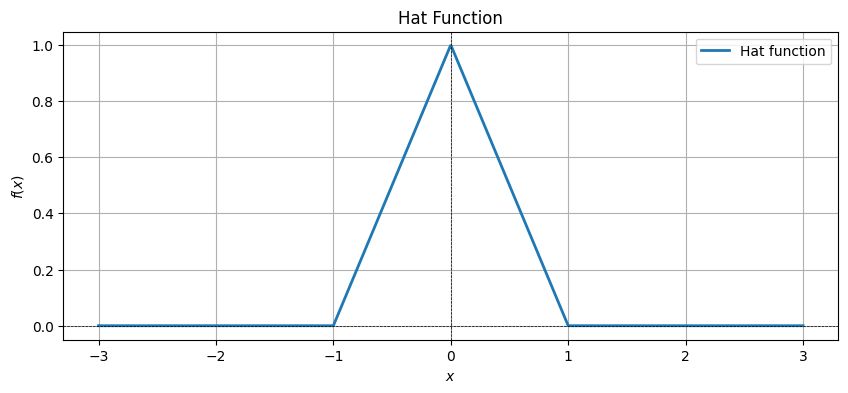

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hat function
def hat_function(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)
    
# Define x values
x_values = np.linspace(-3, 3, 1000)  # Extend beyond the domain for clarity

# Plot the hat function
plt.figure(figsize=(10, 4))
plt.plot(x_values, hat_function(x_values), label="Hat function", linewidth=2)
plt.title("Hat Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--') 
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(True)
plt.legend()
plt.show()


Then, we will show how this approximation works for 5 different frequencies. 
As the ammount of frequencies examined is larger, we will obtain a better approximation:

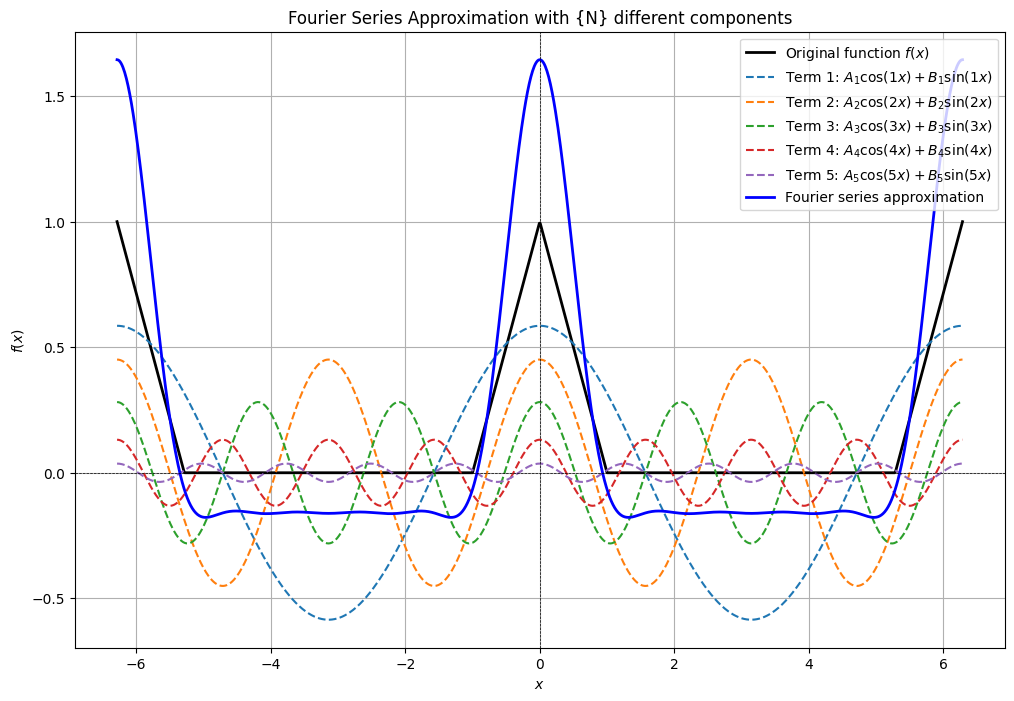

In [122]:
from scipy.integrate import trapezoid
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic extension of the hat function
def f(x):
    # Make x periodic with period 2*pi
    x = np.mod(x + np.pi, 2 * np.pi) - np.pi
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

# Fourier series parameters
N = 5  # Number of terms in the Fourier series (keep small to visualize individual waves)
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)  # Extended range for visualization

# Calculate the Fourier coefficients
def compute_coefficients(N):
    A0 = (1 / (2 * np.pi)) * trapezoid(f(x_values), x_values)  # A0 coefficient
    A_k = []
    B_k = []

    for k in range(1, N + 1):
        # Compute Ak
        cos_terms = f(x_values) * np.cos(k * x_values)
        Ak = (1 / np.pi) * trapezoid(cos_terms, x_values)
        A_k.append(Ak)

        # Compute Bk
        sin_terms = f(x_values) * np.sin(k * x_values)
        Bk = (1 / np.pi) * np.trapezoid(sin_terms, x_values)
        B_k.append(Bk)

    return A0, np.array(A_k), np.array(B_k)

# Reconstruct the Fourier series
def fourier_series(x, A0, A_k, B_k):
    result = A0 / 2  # Start with the A0 term
    terms = [A0 / 2]  # List to store individual terms
    for k in range(1, len(A_k) + 1):
        term = A_k[k - 1] * np.cos(k * x) + B_k[k - 1] * np.sin(k * x)
        result += term
        terms.append(term)
    return result, terms

# Compute coefficients and reconstruct the Fourier series
A0, A_k, B_k = compute_coefficients(N)
f_approx, terms = fourier_series(x_values, A0, A_k, B_k)

# Plot the original function, full approximation, and individual terms
plt.figure(figsize=(12, 8))

# Original function
plt.plot(x_values, f(x_values), label="Original function $f(x)$", linewidth=2, color="black")

# Individual cosine and sine waves
for k in range(1, len(terms)):
    plt.plot(x_values, terms[k], label=f"Term {k}: $A_{k} \\cos({k}x) + B_{k} \\sin({k}x)$", linestyle="--")

# Full Fourier approximation
plt.plot(x_values, f_approx, label="Fourier series approximation", linewidth=2, color="blue")

# Styling the plot
plt.title("Fourier Series Approximation with {N} different components")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(True)
plt.legend()
plt.show()



\begin{array}{@{}l@{}}
\textbf{Calculation of Fourier Coefficients:} \\\\

\text{The coefficients \( A_k \) and \( B_k \) are calculated by taking the inner product of \( f(x) \) with the cosine and sine basis functions.\\\\
This projection extracts the contribution of each frequency component.} \\\\

\text{The inner product of two functions \( f \) and \( g \) over an interval \([a, b]\) is defined as:} \\\\

\langle f, g \rangle = \int_{a}^{b} f(x) g(x) \, dx \\\\

\text{To obtain \( A_k \) and \( B_k \), we take the inner products:} \\\\

A_k = \frac{\langle f, \cos(kx) \rangle}{||\cos(kx)||^2}, \quad B_k = \frac{\langle f, \sin(kx) \rangle}{||\sin(kx)||^2} \\\\

\text{where \( ||g||^2 = \langle g, g \rangle \) is the norm squared of the basis function. \\\\
This normalization ensures each coefficient accurately represents the component of \( f(x) \) in that basis direction.} \\\\

\textbf{Fourier Coefficients on } [-\pi, \pi]: \\\\

\text{To compute the Fourier coefficients, we normalize the inner product by dividing by the interval length \( 2\pi \). \\\\
For \( A_k \) and \( B_k \), we use:} \\\\

A_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(kx) \, dx, \quad 
B_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(kx) \, dx. \\\\

\text{The normalization factor \( \frac{1}{\pi} \) accounts for the interval length \( 2\pi \), as the integral itself spans this length. \\\\
The norm squared of the basis functions \( \cos(kx) \) and \( \sin(kx) \) over \([- \pi, \pi]\) is given by:} \\\\

||\cos(kx)||^2 = \langle \cos(kx), \cos(kx) \rangle = \int_{-\pi}^\pi \cos^2(kx) \, dx = \pi, \\\\
||\sin(kx)||^2 = \langle \sin(kx), \sin(kx) \rangle = \int_{-\pi}^\pi \sin^2(kx) \, dx = \pi. \\\\

\text{When dividing \( \langle f, \cos(kx) \rangle \) by \( ||\cos(kx)||^2 \), the coefficient \( A_k \) becomes:} \\\\

A_k = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos(kx) \, dx. \\\\

\text{Similarly, \( B_k \) is normalized as:} \\\\

B_k = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \sin(kx) \, dx. \\\\


\end{array}


$$
\begin{array}{@{}l@{}}
\text{With the Fourier coefficients \( A_k \) and \( B_k \) calculated, we can construct the Fourier series approximation of \( f(x) \) by summing the terms:} \\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{N} \left(A_k \cos(kx) + B_k \sin(kx)\right) \\\\

\text{We will now plot both the original function and its Fourier series approximation.}
\end{array}
$$



\begin{array}{@{}l@{}}
\textbf{Transforming to } [0, L]: \\\\

\text{For a general interval } [0, L], \text{ we redefine the Fourier series:} \\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^\infty \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right). \\\\

\textbf{Fourier Coefficients on } [0, L]: \\\\

A_0 = \frac{2}{L} \int_0^L f(x) \, dx, \\\\
A_k = \frac{2}{L} \int_0^L f(x) \cos\left(\frac{2\pi k x}{L}\right) \, dx, \\\\
B_k = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{2\pi k x}{L}\right) \, dx. \\\\

\text{The factor } \frac{2}{L} \text{ normalizes the interval length } L, \text{ replacing } \frac{1}{\pi} \text{ for } [-\pi, \pi]. \\\\
\text{The arguments of } \cos \text{ and } \sin, \text{ scaled by } \frac{2\pi}{L}, \text{ reflect the interval's length.}
\end{array}



\begin{array}{l}

\textbf{Matrix Representation of Basis Functions:} \\\\
\text{The cosine and sine basis functions are represented as separate matrices:} \\\\

G_{\cos} = \begin{bmatrix}
\cos(x_1) & \cos(2x_1) & \dots & \cos(Nx_1) \\
\cos(x_2) & \cos(2x_2) & \dots & \cos(Nx_2) \\
\vdots & \vdots & & \vdots \\
\cos(x_M) & \cos(2x_M) & \dots & \cos(Nx_M)
\end{bmatrix}, \quad
G_{\sin} = \begin{bmatrix}
\sin(x_1) & \sin(2x_1) & \dots & \sin(Nx_1) \\
\sin(x_2) & \sin(2x_2) & \dots & \sin(Nx_2) \\
\vdots & \vdots & & \vdots \\
\sin(x_M) & \sin(2x_M) & \dots & \sin(Nx_M)
\end{bmatrix}. \\\\



\text{Here, \( M \) is the number of sample points, and \( N \) is the number of frequencies used. The size of each matrix is \( M \times N \).} \\\\

\textbf{Fourier Coefficients:} \\\\
\text{The Fourier coefficients are computed using the inner product in matrix form:} \\\\
\mathbf{A} = \frac{1}{\pi} G_{\cos}^\top \mathbf{f}, \quad \mathbf{B} = \frac{1}{\pi} G_{\sin}^\top \mathbf{f}, \\\\
\text{where \( \mathbf{A} = [A_1, A_2, \dots, A_N]^\top \) and \( \mathbf{B} = [B_1, B_2, \dots, B_N]^\top \) are the cosine and sine coefficients, respectively.} \\\\

\text{The vector \( \mathbf{f} = [f(x_1), f(x_2), \dots, f(x_M)]^\top \) represents the sampled function values.} \\\\

\textbf{Constant Term \( A_0 \):} \\\\
\text{The constant term \( A_0 \) is computed separately as the average value of \( f(x) \):} \\\\
A_0 = \frac{1}{\pi} \mathbf{f}^\top \mathbf{1}, \quad \text{where \( \mathbf{1} \) is a vector of ones of size \( M \).} \\\\

\textbf{Tensor Representation:} \\\\
\text{The inner product calculation can also be expressed as:} \\\\
c_{jk} = \sum_i G_{ij} f_i, \\\\


\end{array}




\begin{array}{l}
\textbf{For the Interval $[0, L]$:} \\\\

\text{The Fourier series approximates a function \( f(x) \) as:} \\\\
$f(x) \approx \frac{A_0}{2} + \sum_{k=1}^N \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right)$. \\\\\\\\

G_{\cos} = \begin{bmatrix}
\cos\left(\frac{2\pi x_1}{L}\right) & \cos\left(\frac{4\pi x_1}{L}\right) & \dots & \cos\left(\frac{2\pi N x_1}{L}\right) \\
\cos\left(\frac{2\pi x_2}{L}\right) & \cos\left(\frac{4\pi x_2}{L}\right) & \dots & \cos\left(\frac{2\pi N x_2}{L}\right) \\
\vdots & \vdots & & \vdots \\
\cos\left(\frac{2\pi x_M}{L}\right) & \cos\left(\frac{4\pi x_M}{L}\right) & \dots & \cos\left(\frac{2\pi N x_M}{L}\right)
\end{bmatrix}, \quad

G_{\sin} = \begin{bmatrix}
\sin\left(\frac{2\pi x_1}{L}\right) & \sin\left(\frac{4\pi x_1}{L}\right) & \dots & \sin\left(\frac{2\pi N x_1}{L}\right) \\
\sin\left(\frac{2\pi x_2}{L}\right) & \sin\left(\frac{4\pi x_2}{L}\right) & \dots & \sin\left(\frac{2\pi N x_2}{L}\right) \\
\vdots & \vdots & & \vdots \\
\sin\left(\frac{2\pi x_M}{L}\right) & \sin\left(\frac{4\pi x_M}{L}\right) & \dots & \sin\left(\frac{2\pi N x_M}{L}\right)
\end{bmatrix}. \\\\



\end{array}


In [123]:
import pandas as pd


# Define the hat function
def hat_function(x):
    """
    A hat function defined as:
    - Linear increase from 0 to 5
    - Linear decrease from 5 to 10
    interval is: [0,10]
    """
    return np.where(x <= 5, x, 10 - x)

# Parameters
L = 10  # Interval length
N = 10   # Number of Fourier coefficients
M = 100  # Number of sample points

# Generate sample points in the interval [0, L]
x = np.linspace(0, L, M)
y = hat_function(x)

# Compute G_cos and G_sin matrices
G_cos = np.array([[np.cos(2 * np.pi * k * xi / L) for k in range(1, N + 1)] for xi in x])
G_sin = np.array([[np.sin(2 * np.pi * k * xi / L) for k in range(1, N + 1)] for xi in x])

# Fourier coefficient approximations
A = np.dot(G_cos.T, y) * (2 / M)  # Cosine coefficients
B = np.dot(G_sin.T, y) * (2 / M)  # Sine coefficients
A_0 = np.sum(y) * (2 / M)         # Constant term

# Convert matrices to Pandas DataFrames for better readability
G_cos_df = pd.DataFrame(G_cos, columns=[f"cos(2πk={k})" for k in range(1, N + 1)])
G_sin_df = pd.DataFrame(G_sin, columns=[f"sin(2πk={k})" for k in range(1, N + 1)])


In [124]:
print("G_cos Matrix:")
print(G_cos_df)

G_cos Matrix:
    cos(2πk=1)  cos(2πk=2)  cos(2πk=3)  cos(2πk=4)  cos(2πk=5)  cos(2πk=6)  \
0     1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1     0.997987    0.991955    0.981929    0.967949    0.950071    0.928368   
2     0.991955    0.967949    0.928368    0.873849    0.805270    0.723734   
3     0.981929    0.928368    0.841254    0.723734    0.580057    0.415415   
4     0.967949    0.873849    0.723734    0.527225    0.296920    0.047582   
..         ...         ...         ...         ...         ...         ...   
95    0.967949    0.873849    0.723734    0.527225    0.296920    0.047582   
96    0.981929    0.928368    0.841254    0.723734    0.580057    0.415415   
97    0.991955    0.967949    0.928368    0.873849    0.805270    0.723734   
98    0.997987    0.991955    0.981929    0.967949    0.950071    0.928368   
99    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

    cos(2πk=7)  cos(2πk=8)  cos(2πk=9)  cos(2πk=1

In [125]:
print("\nG_sin Matrix:")
print(G_sin_df)


G_sin Matrix:
      sin(2πk=1)    sin(2πk=2)    sin(2πk=3)    sin(2πk=4)    sin(2πk=5)  \
0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   6.342392e-02  1.265925e-01  1.892512e-01  2.511480e-01  3.120334e-01   
2   1.265925e-01  2.511480e-01  3.716625e-01  4.861967e-01  5.929079e-01   
3   1.892512e-01  3.716625e-01  5.406408e-01  6.900790e-01  8.145760e-01   
4   2.511480e-01  4.861967e-01  6.900790e-01  8.497254e-01  9.549022e-01   
..           ...           ...           ...           ...           ...   
95 -2.511480e-01 -4.861967e-01 -6.900790e-01 -8.497254e-01 -9.549022e-01   
96 -1.892512e-01 -3.716625e-01 -5.406408e-01 -6.900790e-01 -8.145760e-01   
97 -1.265925e-01 -2.511480e-01 -3.716625e-01 -4.861967e-01 -5.929079e-01   
98 -6.342392e-02 -1.265925e-01 -1.892512e-01 -2.511480e-01 -3.120334e-01   
99 -2.449294e-16 -4.898587e-16 -7.347881e-16 -9.797174e-16 -1.224647e-15   

      sin(2πk=6)    sin(2πk=7)    sin(2πk=8)    sin(2πk=9)   sin(2πk=10)

In [126]:
print("\nFourier Coefficients:")
print(f"A_0 = {A_0}")


Fourier Coefficients:
A_0 = 4.949494949494949


In [127]:
print(f"A_k = {A}")

A_k = [-2.00632779e+00 -5.05559432e-04 -2.23075030e-01 -5.07090323e-04
 -8.04149397e-02 -5.09655575e-04 -4.11107956e-02 -5.13276088e-04
 -2.49364394e-02 -5.17981627e-04]


In [128]:
print(f"B_k = {B}")

B_k = [ 1.69766545e-16 -2.12633730e-17 -2.03422348e-16 -4.26898100e-16
 -1.32394096e-16 -1.78329573e-16 -4.08787587e-16  7.26623622e-16
  5.01491210e-16 -9.30817923e-16]


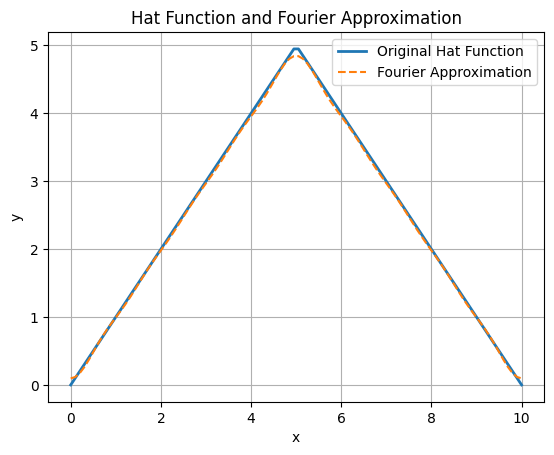

In [129]:
# Plot the original hat function and its Fourier approximation
y_fourier = A_0 / 2 + sum(A[k - 1] * np.cos(2 * np.pi * k * x / L) + B[k - 1] * np.sin(2 * np.pi * k * x / L) for k in range(1, N + 1))

plt.plot(x, y, label="Original Hat Function", linewidth=2)
plt.plot(x, y_fourier, label="Fourier Approximation", linestyle="--")
plt.title("Hat Function and Fourier Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Euler's Rule


\begin{array}{l}

\textbf{Representation of Complex Numbers:} \\\\

\text{A complex number \( z \) can be represented in Cartesian form as:} \\\\
z = x + iy, \quad \text{where \( x \) is the real part and \( y \) is the imaginary part.} \\\\
\text{In polar coordinates, we relate \( x \) and \( y \) to the magnitude \( R \) and angle \( \theta \):} \\\\
x = R \cos(\theta), \quad y = R \sin(\theta). \\\\
\text{Using these relations, the complex number can be expressed as:} \\\\
z = R (\cos(\theta) + i \sin(\theta)). \\\\
\text{Using Euler's formula, we rewrite this as:} \\\\
z = R e^{i\theta}, \quad \text{where \( R = \sqrt{x^2 + y^2} \) is the magnitude, and \( \theta = \arctan\left(\frac{y}{x}\right) \) is the angle.} \\\\

\textbf{Properties of Complex Numbers in Polar Form:} \\\\
\text{For two complex numbers \( z_1 = R_1 e^{i\theta_1} \) and \( z_2 = R_2 e^{i\theta_2} \):} \\\\
\text{Multiplication: } z_1 z_2 = R_1 R_2 e^{i(\theta_1 + \theta_2)}, \quad
\text{Division: } \frac{z_1}{z_2} = \frac{R_1}{R_2} e^{i(\theta_1 - \theta_2)}. \\\\

\textbf{Taylor Series Expansions of Exponentials, Sine, and Cosine:} \\\\
\text{The Taylor expansion for \( e^x \) is:} \\\\
e^x = \sum_{k=0}^\infty \frac{x^k}{k!}, \quad \text{where \( x \in \mathbb{C} \)}. \\\\
\text{For the complex exponential \( e^{ix} \), the series becomes:} \\\\
e^{ix} = \sum_{k=0}^\infty \frac{(ix)^k}{k!} = 1 + ix - \frac{x^2}{2!} - i\frac{x^3}{3!} + \frac{x^4}{4!} + \dots \\\\
\text{Grouping terms into real and imaginary parts:} \\\\
e^{ix} = \left( 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \dots \right) + i \left( x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots \right). \\\\
\text{These real and imaginary parts correspond to the Taylor series for \( \cos(x) \) and \( \sin(x) \), respectively:} \\\\
\cos(x) = \sum_{n=0}^\infty \frac{(-1)^n x^{2n}}{(2n)!}, \quad
\sin(x) = \sum_{n=0}^\infty \frac{(-1)^n x^{2n+1}}{(2n+1)!}. \\\\
\text{Thus, we derive Euler's formula:} \\\\
e^{ix} = \cos(x) + i \sin(x). \\\\

\textbf{The Benefits of Euler's Formula:} \\\\
\text{Using Euler's formula, we can represent trigonometric functions in terms of exponentials:} \\\\
\cos(x) = \frac{e^{ix} + e^{-ix}}{2}, \quad \sin(x) = \frac{e^{ix} - e^{-ix}}{2i}. \\\\
\text{This reduces the need to compute separate sine and cosine terms, simplifying calculations.} \\\\

\textbf{The Role of the Conjugate in Fourier Analysis:} \\\\
\text{The complex conjugate of a complex number \( z = a + bi \) is \( \overline{z} = a - bi \). For exponentials, the conjugate is:} \\\\
\overline{e^{ix}} = e^{-ix}, \quad \text{which corresponds to flipping the sign of the imaginary part.} \\\\
\text{The complex conjugate is essential in Fourier analysis when computing the Fourier coefficients:} \\\\
C_k = \frac{1}{L} \int_0^L f(x) \overline{e^{i \frac{2\pi k x}{L}}} \, dx. \\\\
\text{Since \( \overline{e^{i \theta}} = e^{-i \theta} \), this ensures that the inner product isolates the contribution of the \( k \)-th mode:} \\\\
\int_0^L e^{i \frac{2\pi j x}{L}} \overline{e^{i \frac{2\pi k x}{L}}} \, dx = 
\begin{cases} 
L, & \text{if } j = k, \\\\
0, & \text{if } j \neq k.
\end{cases} \\\\
\text{This orthogonality property simplifies the computation of Fourier coefficients \( C_k \), reducing redundant calculations.} \\\\

\end{array}




\begin{array}{l}

\textbf{Fourier Series for \([0, L]\):} \\\\

\text{For a general interval } [0, L], \text{ the Fourier series for a function \( f(x) \) is defined as:} \\\\
f(x) \approx \frac{A_0}{2} + \sum_{k=1}^\infty \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right). \\\\

\text{The Fourier coefficients are given by:} \\\\
A_0 = \frac{2}{L} \int_0^L f(x) \, dx, \quad
A_k = \frac{2}{L} \int_0^L f(x) \cos\left(\frac{2\pi k x}{L}\right) \, dx, \quad
B_k = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{2\pi k x}{L}\right) \, dx. \\\\

\text{Using Euler's formula, we can rewrite the Fourier series as:} \\\\
f(x) \approx \sum_{k=-\infty}^\infty C_k e^{i \frac{2\pi k x}{L}}, \quad C_k = \frac{1}{L} \int_0^L f(x) e^{-i \frac{2\pi k x}{L}} \, dx.

\end{array}



## Discrete Fourier Transform


\begin{array}{l}
\textbf{Transition to the Discrete Fourier Transform (DFT):} \\\\

\text{The DFT discretizes the Fourier transform by sampling \( f(x) \) at \( N \) equally spaced points:} \\\\
x_j = \frac{j}{N}, \quad j = 0, 1, \dots, N-1. \\\\
\text{The DFT coefficients are computed as:} \\\\
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i \frac{2\pi j k}{N}}, \quad k = 0, 1, \dots, N-1. \\\\
\text{The inverse DFT reconstructs the original function:} \\\\
f_j = \sum_{k=0}^{N-1} \hat{f}_k e^{i \frac{2\pi j k}{N}}.\\\\



\text{Given a function \( f(x) \), after sampling it at \( N \) equally spaced points, we can form a vector of discrete values:} \\\\
\mathbf{f} = [f_1, f_2, \dots, f_N]^\top. \\\\
\text{These samples correspond to the function values at discrete positions \( x_j \)} \\\\

\textbf{Matrix Representation of the DFT:} \\\\
\text{The Discrete Fourier Transform can be represented as a matrix multiplication using the matrix \( \mathbf{W}_N \), defined as:} \\\\
\mathbf{W}_{N} = \begin{bmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & W_N & W_N^2 & \dots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \dots & W_N^{2(N-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & W_N^{N-1} & W_N^{2(N-1)} & \dots & W_N^{(N-1)(N-1)}
\end{bmatrix}, \quad W_N = e^{-2\pi i / N}. \\\\

\text{Here, \( W_N \) encapsulates the periodic structure of the exponential basis functions \( e^{-2\pi i k x / N} \), which combine cosine and sine terms.} \\\\
\text{Each row of \( \mathbf{W}_N \) represents a frequency component, and each column corresponds to a sample point.} \\\\

\textbf{Computing the DFT:} \\\\
\text{The Fourier coefficients, \( \hat{\mathbf{f}} \), are computed as:} \\\\
\hat{\mathbf{f}} = \mathbf{W}_N \mathbf{f}, \quad \text{where \( \mathbf{W}_N \mathbf{f} \) performs the summation:} \\\\
\hat{f}_k = \sum_{j=0}^{N-1} f_j e^{-2\pi i j k / N}, \quad k = 0, 1, \dots, N-1. \\\\
\text{This operation maps the time-domain signal \( \mathbf{f} \) to its frequency-domain representation \( \hat{\mathbf{f}} \).} \\\\

\textbf{Inverse DFT:} \\\\
\text{The original signal \( \mathbf{f} \) can be reconstructed from its Fourier coefficients \( \hat{\mathbf{f}} \) using the inverse DFT:} \\\\
\mathbf{f} = \frac{1}{N} \mathbf{W}_N^{-1} \hat{\mathbf{f}}, \quad \text{where \( \mathbf{W}_N^{-1} \) is the inverse of the Fourier matrix.} \\\\
\text{The inverse DFT performs the summation:} \\\\
f_j = \frac{1}{N} \sum_{k=0}^{N-1} \hat{f}_k e^{2\pi i j k / N}, \quad j = 0, 1, \dots, N-1. \\\\

\end{array}



Recording for 5 seconds...
Recording saved to recorded_audio.wav


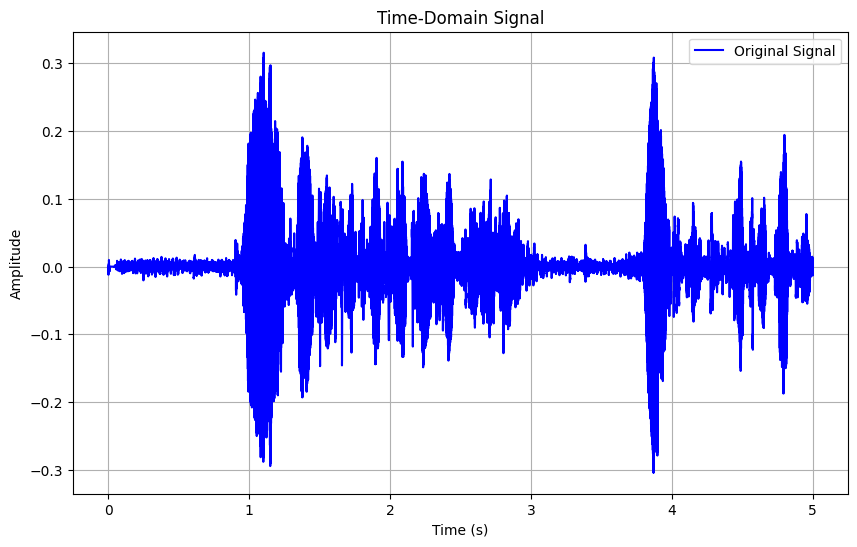

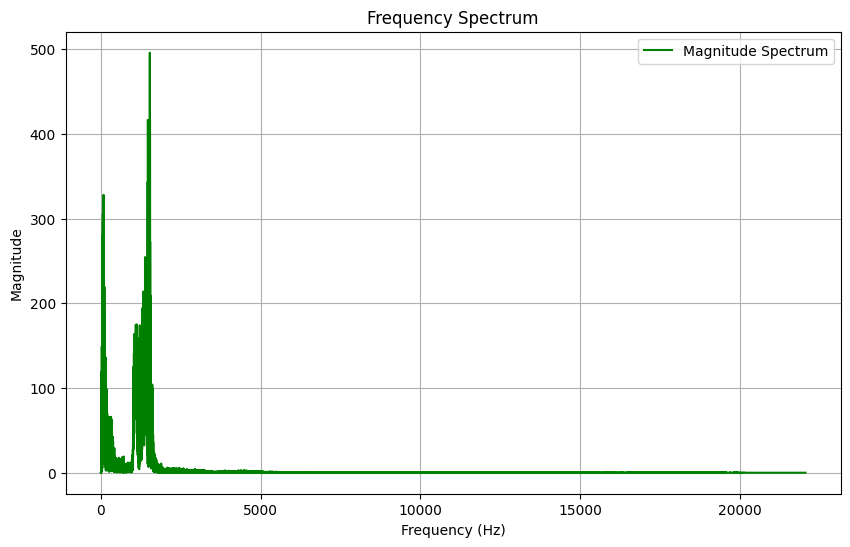

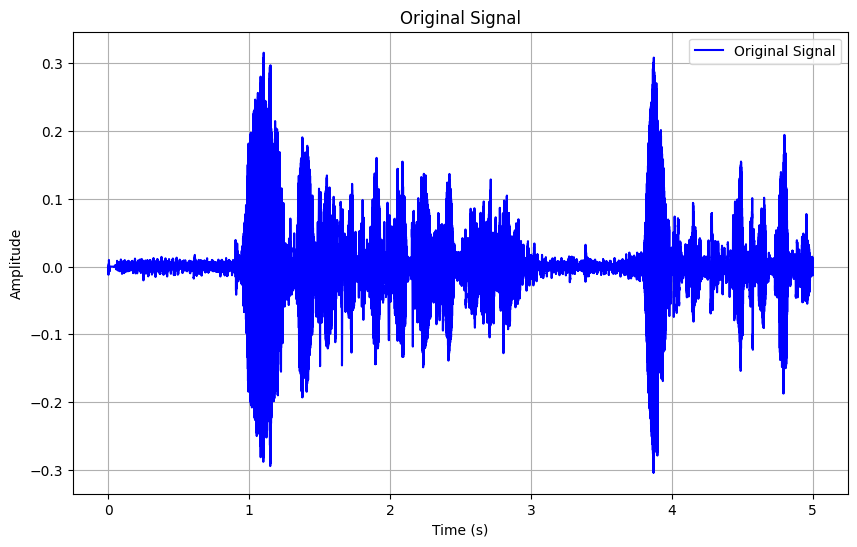

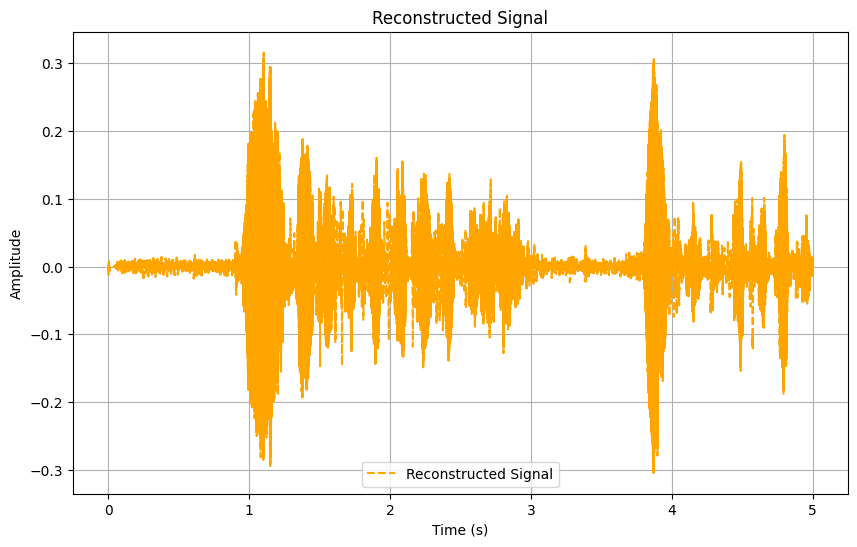

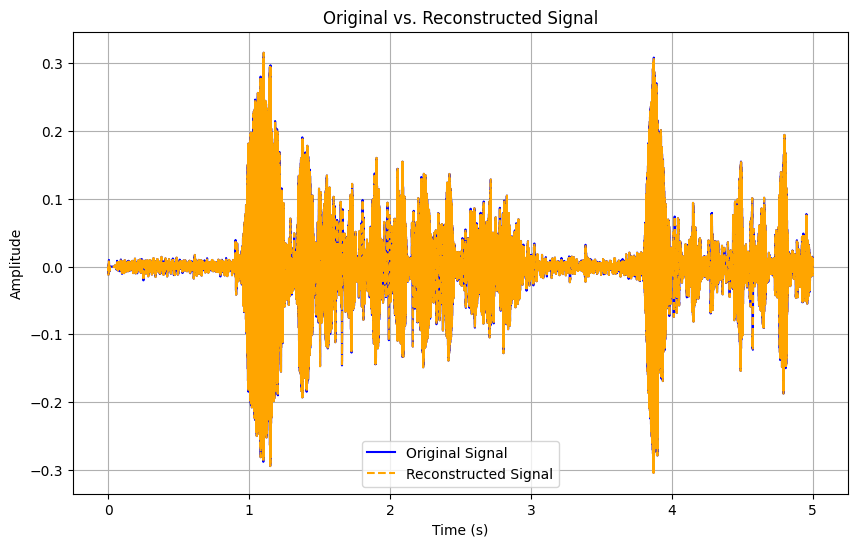

In [130]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd
import wave

# Function to record audio if no file is provided
def record_audio(output_file, duration=5, sampling_rate=44100):
    print(f"Recording for {duration} seconds...")
    audio_data = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is finished
    audio_data = (audio_data * 32767).astype(np.int16)  # Convert to 16-bit PCM format
    # Save the recorded audio
    with wave.open(output_file, 'wb') as wf:
        wf.setnchannels(1)  # Mono
        wf.setsampwidth(2)  # 16-bit PCM
        wf.setframerate(sampling_rate)
        wf.writeframes(audio_data.tobytes())
    print(f"Recording saved to {output_file}")
    return output_file

# Load the audio file
def load_audio(file_path):
    sampling_rate, audio_data = wavfile.read(file_path)
    # Normalize audio data
    if audio_data.dtype == 'int16':
        audio_data = audio_data / 2**15
    elif audio_data.dtype == 'int32':
        audio_data = audio_data / 2**31
    return sampling_rate, audio_data

# Compute the DFT and Fourier Coefficients
def compute_dft(audio_data, sampling_rate):
    N = len(audio_data)  # Number of samples
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)  # Frequency axis
    dft_coefficients = np.fft.fft(audio_data)  # DFT coefficients
    return frequencies[:N//2], np.abs(dft_coefficients[:N//2]), dft_coefficients  # Positive frequencies only

# Reconstruct signal using Fourier coefficients
def reconstruct_signal(dft_coefficients, N):
    return np.fft.ifft(dft_coefficients).real[:N]

# Plot the original time-domain signal
def plot_time_domain(audio_data, sampling_rate):
    N = len(audio_data)
    time = np.linspace(0, N / sampling_rate, N, endpoint=False)
    plt.figure(figsize=(10, 6))
    plt.plot(time, audio_data, label="Original Signal", color='blue')
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the frequency spectrum
def plot_frequency_spectrum(frequencies, magnitudes):
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, magnitudes, label="Magnitude Spectrum", color='green')
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the original signal and its reconstruction separately
def plot_reconstruction_separate(original, reconstructed, sampling_rate):
    N = len(original)
    time = np.linspace(0, N / sampling_rate, N, endpoint=False)
    
    # Plot original signal
    plt.figure(figsize=(10, 6))
    plt.plot(time, original, label="Original Signal", color='blue')
    plt.title("Original Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot reconstructed signal
    plt.figure(figsize=(10, 6))
    plt.plot(time, reconstructed, label="Reconstructed Signal", color='orange', linestyle="--")
    plt.title("Reconstructed Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the original and reconstructed signals together
def plot_reconstruction_combined(original, reconstructed, sampling_rate):
    N = len(original)
    time = np.linspace(0, N / sampling_rate, N, endpoint=False)
    
    plt.figure(figsize=(10, 6))
    plt.plot(time, original, label="Original Signal", color='blue')
    plt.plot(time, reconstructed, label="Reconstructed Signal", color='orange', linestyle="--")
    plt.title("Original vs. Reconstructed Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main function to load, transform, and plot the audio
def process_audio(file_path=None, record=False, duration=5):
    if record:
        file_path = record_audio("recorded_audio.wav", duration=duration)
    sampling_rate, audio_data = load_audio(file_path)
    if len(audio_data.shape) > 1:  # Stereo audio, take one channel
        audio_data = audio_data[:, 0]

    # Plot the original time-domain signal
    plot_time_domain(audio_data, sampling_rate)

    # Compute DFT
    frequencies, magnitudes, dft_coefficients = compute_dft(audio_data, sampling_rate)

    # Plot the frequency spectrum
    plot_frequency_spectrum(frequencies, magnitudes)

    # Reconstruct the signal
    reconstructed_signal = reconstruct_signal(dft_coefficients, len(audio_data))

    # Plot original and reconstructed signals separately
    plot_reconstruction_separate(audio_data, reconstructed_signal, sampling_rate)

    # Plot original and reconstructed signals together
    plot_reconstruction_combined(audio_data, reconstructed_signal, sampling_rate)

# Prompt the user to either load a file or record audio
def main():
    choice = input("Do you want to load an audio file or record audio? (load/record): ").strip().lower()
    if choice == "load":
        file_path = input("Enter the path to the audio file (.wav): ").strip()
        process_audio(file_path=file_path)
    elif choice == "record":
        process_audio(record=True, duration=5)  # Record for 5 seconds
    else:
        print("Invalid choice. Please type 'load' or 'record'.")

# Run the main function
if __name__ == "__main__":
    main()



\begin{array}{l}

\textbf{Eigenvalues and Eigenfunctions of the Fourier Transform:} \\\\

\textbf{Fourier Transform Matrix in the Discrete Case (DFT Matrix):} \\\\
\text{In the case of the Discrete Fourier Transform (DFT), the Fourier transform matrix \( \mathbf{W}_N \) is defined as:} \\\\
\mathbf{W}_{N} = \begin{bmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & W_N & W_N^2 & \dots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \dots & W_N^{2(N-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & W_N^{N-1} & W_N^{2(N-1)} & \dots & W_N^{(N-1)(N-1)}
\end{bmatrix}, \quad W_N = e^{-2\pi i / N}. \\\\
\text{The eigenvalues of \( \mathbf{W}_N \) are:} \\\\
\lambda_k = e^{-2\pi i k / N}, \quad k = 0, 1, \dots, N-1. \\\\
\text{The eigenfunctions (like eigenvecors) of the DFT are complex exponentials \( e^{i k x} \), which combine sine and cosine via Euler's formula:} \\\\
e^{i k x} = \cos(kx) + i \sin(kx). \\\\
\text{Thus, We can exploit this property for faster calculations in the future.} \\\\

\end{array}



## References

\begin{array}{l}

\text{Brunton, Steven L., and J. Nathan Kutz}. \textit{Data-Driven Science and Engineering}. \text{University of Washington Press, 28 Feb. 2019.}\\\\
\text{Stein, Elias M., and Rami Shakarchi}.\ \textit{Fourier Analysis: An Introduction}. \text{Princeton University Press, 2007.}

\end{array}

